In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv("D:/KHOÁ LUẬN TỐT NGHIỆP - THẢO LY/Churn_Modelling.csv")
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [3]:
#Mã hoá dữ liệu 
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender']  = label_encoder.fit_transform(df['Gender'])
print(df.head(10))

   RowNumber  CustomerId   Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602  Hargrave          619          0       0   42   
1          2    15647311      Hill          608          2       0   41   
2          3    15619304      Onio          502          0       0   42   
3          4    15701354      Boni          699          0       0   39   
4          5    15737888  Mitchell          850          2       0   43   
5          6    15574012       Chu          645          2       1   44   
6          7    15592531  Bartlett          822          0       1   50   
7          8    15656148    Obinna          376          1       0   29   
8          9    15792365        He          501          0       1   44   
9         10    15592389        H?          684          0       1   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1       

In [4]:
#Kiểm tra dữ liệu trống
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [5]:
#Kiểm tra dữ liệu trùng lặp và loại bỏ
df = df.drop_duplicates()
print(df.head(5))

   RowNumber  CustomerId   Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602  Hargrave          619          0       0   42   
1          2    15647311      Hill          608          2       0   41   
2          3    15619304      Onio          502          0       0   42   
3          4    15701354      Boni          699          0       0   39   
4          5    15737888  Mitchell          850          2       0   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4      

In [6]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602  Hargrave          619          0       0   42   
1          2    15647311      Hill          608          2       0   41   
2          3    15619304      Onio          502          0       0   42   
3          4    15701354      Boni          699          0       0   39   
4          5    15737888  Mitchell          850          2       0   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4      

In [7]:
#Chuẩn hoá dữ liệu
scaler= StandardScaler()
columns_to_normalize = ['CreditScore', 'Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df.head(5))

   RowNumber  CustomerId   Surname  CreditScore  Geography  Gender       Age  \
0          1    15634602  Hargrave    -0.326221          0       0  0.293517   
1          2    15647311      Hill    -0.440036          2       0  0.198164   
2          3    15619304      Onio    -1.536794          0       0  0.293517   
3          4    15701354      Boni     0.501521          0       0  0.007457   
4          5    15737888  Mitchell     2.063884          2       0  0.388871   

     Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0 -1.041760 -1.225848      -0.911583          1               1   
1 -1.387538  0.117350      -0.911583          0               1   
2  1.032908  1.333053       2.527057          1               0   
3 -1.387538 -1.225848       0.807737          0               0   
4 -1.041760  0.785728      -0.911583          1               1   

   EstimatedSalary  Exited  
0         0.021886       1  
1         0.216534       0  
2         0.240687       1  


In [8]:
scaler = StandardScaler()
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [9]:
df = df.drop('Surname', axis=1)

In [10]:
#xử lý mất cân bằng dữ liệu
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(df.drop('Exited', axis=1), df['Exited'])
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [11]:
#Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(df_resampled.drop('Exited', axis=1), df_resampled['Exited'], test_size=0.2, random_state=42)

# Xây dựng mô hình dự đoán

## 1. Hồi quy Logistic (Logistic Regression)

In [12]:
# Mô hình cấp 0 (Logistic Regression)
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
lr_model = LogisticRegression(random_state=42)
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

#Lấy mô hình tốt nhất
best_lr_model= grid_search_lr.best_estimator_

#Tạo bản sao X_train
X_train_copy_lr = X_train.copy()

#Thêm dự đoán của mô hình cấp 0 vào tập dữ liệu huấn luyện
X_train_copy_lr['Prediction_LR'] = best_lr_model.predict(X_train)

#Huấn luyện mô hình cấp 1
final_lr_model = LogisticRegression(random_state=42)
final_lr_model.fit(X_train_copy_lr, y_train)

LogisticRegression(random_state=42)

In [13]:
#Đánh giá mô hình cấp 1 trên tập kiểm tra
X_test_copy_lr = X_test.copy()
X_test_copy_lr['Prediction_LR'] = best_lr_model.predict(X_test)
predictions_lr_test = final_lr_model.predict(X_test_copy_lr)
print(classification_report(y_test, predictions_lr_test))
# Đánh giá mô hình trên tập kiểm tra và lưu kết quả vào biến report
report = classification_report(y_test, predictions_lr_test, output_dict=True)
print("Accuracy:", round(report['accuracy'], 5))
print("Recall:", round(report['macro avg']['recall'], 5))
print("Precision:", round(report['macro avg']['precision'], 5))
print("F1-score:", round(report['macro avg']['f1-score'], 5))

              precision    recall  f1-score   support

           0       0.51      0.52      0.51      1349
           1       0.51      0.50      0.51      1369

    accuracy                           0.51      2718
   macro avg       0.51      0.51      0.51      2718
weighted avg       0.51      0.51      0.51      2718

Accuracy: 0.50883
Recall: 0.50891
Precision: 0.50892
F1-score: 0.5088


Confusion matrix:
[[702 647]
 [688 681]]


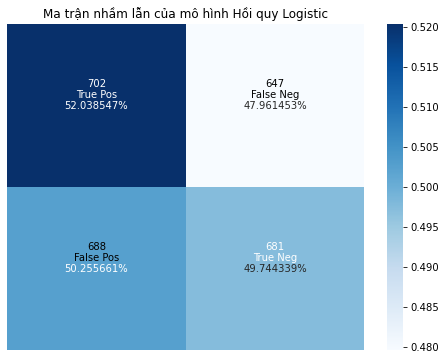

In [14]:
#Tính ma trận nhầm lẫn của mô hình Random Forest
cm_lr = confusion_matrix(y_test, predictions_lr_test)
print('Confusion matrix:')
print(cm_lr)

def annotate_heatmap(ax, data=None, fmt="d", threshold=None):
    if data is None:
        return
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = f"{data[i, j]}\n{labels[i*len(labels)//data.shape[1] + j]}"
            if labels[i*len(labels)//data.shape[1] + j] in ['True Neg', 'True Pos']:
                    color = "white"  # Đặt màu cho True Neg và True Pos là màu đen
            else:
                    color = "black"  
            ax.text(j + 0.5, i + 0.4, text, ha="center", va="center", color=color)

cm_lr_percentage = cm_lr / cm_lr.sum(axis=1)[:, np.newaxis]

# Đặt nhãn cho các chiều của ma trận
labels = ['True Pos', 'False Neg', 'False Pos', 'True Neg']

# Vẽ biểu đồ           
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_percentage, annot=True, fmt="2%", cmap='Blues', xticklabels=False, yticklabels=False)
plt.title('Ma trận nhầm lẫn của mô hình Hồi quy Logistic')
ax = plt.gca()
annotate_heatmap(ax, cm_lr)
plt.show()

AUC của mô hình Hồi quy Logistic: 0.5092769527085237


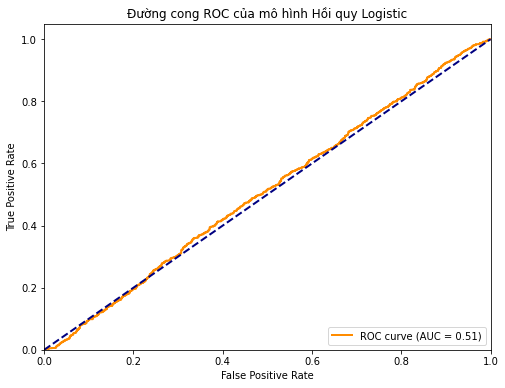

In [15]:
# Tính dự đoán của mô hình trên tập kiểm tra
y_score_lr = final_lr_model.predict_proba(X_test_copy_lr)[:,1]

# Tính FPR, TPR và ngưỡng
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_score_lr)

# Tính diện tích dưới đường ROC (AUC)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# In giá trị AUC và đường ROC
print("AUC của mô hình Hồi quy Logistic:", roc_auc_lr)

# Vẽ đường ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC của mô hình Hồi quy Logistic')
plt.legend(loc="lower right")
plt.show()

## 2. Cây quyết định (Decision Tree)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
# Mô hình cấp 0 (Cây quyết định)
param_grid_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [18]:
# Lấy mô hình tốt nhất
best_dt_model = grid_search_dt.best_estimator_

# Tạo bản sao X_train
X_train_copy_dt = X_train.copy()

# Thêm dự đoán của mô hình cấp 0 vào tập dữ liệu huấn luyện
X_train_copy_dt['Prediction_DT'] = best_dt_model.predict(X_train)

# Huấn luyện mô hình cấp 1
final_dt_model = DecisionTreeClassifier(random_state=42)
final_dt_model.fit(X_train_copy_dt, y_train)

# Đánh giá mô hình cấp 1 trên tập kiểm tra
X_test_copy_dt = X_test.copy()
X_test_copy_dt['Prediction_DT'] = best_dt_model.predict(X_test)
predictions_dt_test = final_dt_model.predict(X_test_copy_dt)
print(classification_report(y_test, predictions_dt_test))

# Đánh giá mô hình trên tập kiểm tra và lưu kết quả vào biến report
report = classification_report(y_test, predictions_dt_test, output_dict=True)
print("Accuracy:", round(report['accuracy'], 5))
print("Recall:", round(report['macro avg']['recall'], 5))
print("Precision:", round(report['macro avg']['precision'], 5))
print("F1-score:", round(report['macro avg']['f1-score'], 5))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1349
           1       0.83      0.84      0.83      1369

    accuracy                           0.83      2718
   macro avg       0.83      0.83      0.83      2718
weighted avg       0.83      0.83      0.83      2718

Accuracy: 0.83149
Recall: 0.83141
Precision: 0.83165
F1-score: 0.83144


Confusion matrix:
[[1106  243]
 [ 215 1154]]


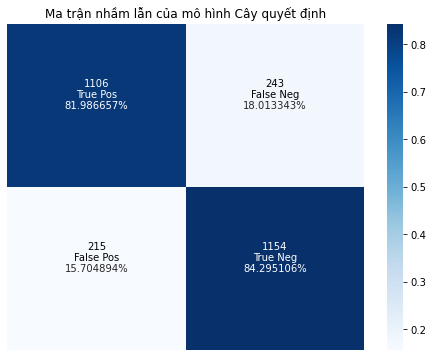

In [19]:
#Tính ma trận nhầm lẫn của mô hình Cây quyết định
cm_dt = confusion_matrix(y_test, predictions_dt_test)
print('Confusion matrix:')
print(cm_dt)

def annotate_heatmap(ax, data=None, fmt="d", threshold=None):
    if data is None:
        return
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = f"{data[i, j]}\n{labels[i*len(labels)//data.shape[1] + j]}"
            if labels[i*len(labels)//data.shape[1] + j] in ['True Neg', 'True Pos']:
                    color = "white"  # Đặt màu cho True Neg và True Pos là màu đen
            else:
                    color = "black"  
            ax.text(j + 0.5, i + 0.4, text, ha="center", va="center", color=color)

cm_dt_percentage = cm_dt / cm_dt.sum(axis=1)[:, np.newaxis]

# Đặt nhãn cho các chiều của ma trận
labels = ['True Pos', 'False Neg', 'False Pos', 'True Neg']

# Vẽ biểu đồ           
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_percentage, annot=True, fmt="2%", cmap='Blues', xticklabels=False, yticklabels=False)
plt.title('Ma trận nhầm lẫn của mô hình Cây quyết định')
ax = plt.gca()
annotate_heatmap(ax, cm_dt)
plt.show()

AUC của mô hình Cây quyết định: 0.8314088134976481


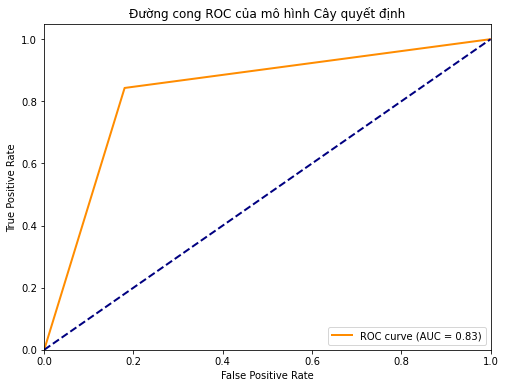

In [20]:
# Tính dự đoán của mô hình trên tập kiểm tra
y_score_dt = final_dt_model.predict_proba(X_test_copy_dt)[:,1]

# Tính FPR, TPR và ngưỡng
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_score_dt)

# Tính diện tích dưới đường ROC (AUC)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# In giá trị AUC và đường ROC
print("AUC của mô hình Cây quyết định:", roc_auc_dt)

# Vẽ đường ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC của mô hình Cây quyết định')
plt.legend(loc="lower right")
plt.show()

## 3. KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Mô hình cấp 0 (KNN)
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_model = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Lấy mô hình tốt nhất
best_knn_model = grid_search_knn.best_estimator_

# Tạo bản sao X_train
X_train_copy_knn = X_train.copy()

# Thêm dự đoán của mô hình cấp 0 vào tập dữ liệu huấn luyện
X_train_copy_knn['Prediction_KNN'] = best_knn_model.predict(X_train)

# Huấn luyện mô hình cấp 1
final_knn_model = KNeighborsClassifier()
final_knn_model.fit(X_train_copy_knn, y_train)

# Đánh giá mô hình cấp 1 trên tập kiểm tra
X_test_copy_knn = X_test.copy()
X_test_copy_knn['Prediction_KNN'] = best_knn_model.predict(X_test)
predictions_knn_test = final_knn_model.predict(X_test_copy_knn)
print(classification_report(y_test, predictions_knn_test))
# Đánh giá mô hình trên tập kiểm tra và lưu kết quả vào biến report
report = classification_report(y_test, predictions_knn_test, output_dict=True)
print("Accuracy:", round(report['accuracy'], 5))
print("Recall:", round(report['macro avg']['recall'], 5))
print("Precision:", round(report['macro avg']['precision'], 5))
print("F1-score:", round(report['macro avg']['f1-score'], 5))

C:\Users\Minh Vu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [0.73091076 0.77074517 0.70386385 0.76439742 0.68969641 0.7598896
 0.73091076 0.77074517 0.70386385 0.76439742 0.68969641 0.7598896
 0.73091076 0.77074517 0.70386385 0.76439742 0.68969641 0.7598896
        nan        nan        nan        nan        nan        nan]
  warnings.warn(


              precision    recall  f1-score   support

           0       0.76      0.63      0.69      1349
           1       0.69      0.80      0.74      1369

    accuracy                           0.72      2718
   macro avg       0.72      0.72      0.72      2718
weighted avg       0.72      0.72      0.72      2718

Accuracy: 0.71818
Recall: 0.71755
Precision: 0.7243
F1-score: 0.71585


Confusion matrix:
[[ 853  496]
 [ 270 1099]]


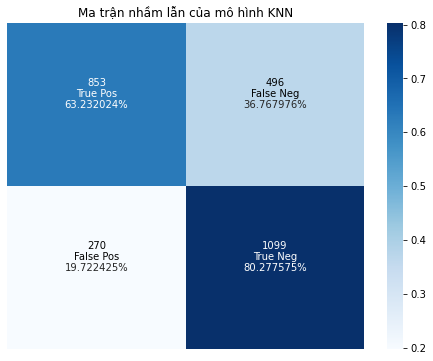

In [23]:
#Tính ma trận nhầm lẫn của mô hình KNN
cm_knn = confusion_matrix(y_test, predictions_knn_test)
print('Confusion matrix:')
print(cm_knn)

def annotate_heatmap(ax, data=None, fmt="d", threshold=None):
    if data is None:
        return
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = f"{data[i, j]}\n{labels[i*len(labels)//data.shape[1] + j]}"
            if labels[i*len(labels)//data.shape[1] + j] in ['True Neg', 'True Pos']:
                    color = "white"  # Đặt màu cho True Neg và True Pos là màu đen
            else:
                    color = "black"  
            ax.text(j + 0.5, i + 0.4, text, ha="center", va="center", color=color)

cm_knn_percentage = cm_knn / cm_knn.sum(axis=1)[:, np.newaxis]

# Đặt nhãn cho các chiều của ma trận
labels = ['True Pos', 'False Neg', 'False Pos', 'True Neg']

# Vẽ biểu đồ           
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_percentage, annot=True, fmt="2%", cmap='Blues', xticklabels=False, yticklabels=False)
plt.title('Ma trận nhầm lẫn của mô hình KNN')
ax = plt.gca()
annotate_heatmap(ax, cm_knn)
plt.show()

AUC của mô hình KNN: 0.7768644468402047


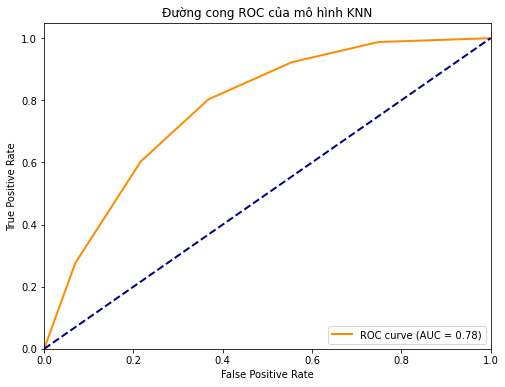

In [24]:
# Tính dự đoán của mô hình trên tập kiểm tra
y_score_knn = final_knn_model.predict_proba(X_test_copy_knn)[:,1]

# Tính FPR, TPR và ngưỡng
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_score_knn)

# Tính diện tích dưới đường ROC (AUC)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# In giá trị AUC và đường ROC
print("AUC của mô hình KNN:", roc_auc_knn)

# Vẽ đường ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC của mô hình KNN')
plt.legend(loc="lower right")
plt.show()

## 4. Random Forest

In [26]:
#  Mô hình cấp 0 (Random Forest)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [27]:
# Lấy mô hình tốt nhất
best_rf_model = grid_search_rf.best_estimator_

# Tạo bản sao X_train
X_train_copy_rf = X_train.copy()

# Thêm dự đoán của mô hình cấp 0 vào tập dữ liệu huấn luyện
X_train_copy_rf['Prediction_RF'] = best_rf_model.predict(X_train)

# Huấn luyện mô hình cấp 1
final_rf_model = RandomForestClassifier(random_state=42)
final_rf_model.fit(X_train_copy_rf, y_train)

# Đánh giá mô hình cấp 1 trên tập kiểm tra
X_test_copy_rf = X_test.copy()
X_test_copy_rf['Prediction_RF'] = best_rf_model.predict(X_test)
predictions_rf_test = final_rf_model.predict(X_test_copy_rf)
print(classification_report(y_test, predictions_rf_test))
# Đánh giá mô hình trên tập kiểm tra và lưu kết quả vào biến report
report = classification_report(y_test, predictions_rf_test, output_dict=True)
print("Accuracy:", round(report['accuracy'], 5))
print("Recall:", round(report['macro avg']['recall'], 5))
print("Precision:", round(report['macro avg']['precision'], 5))
print("F1-score:", round(report['macro avg']['f1-score'], 5))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1349
           1       0.92      0.86      0.89      1369

    accuracy                           0.89      2718
   macro avg       0.89      0.89      0.89      2718
weighted avg       0.89      0.89      0.89      2718

Accuracy: 0.89294
Recall: 0.89319
Precision: 0.89471
F1-score: 0.89285


Confusion matrix:
[[1251   98]
 [ 193 1176]]


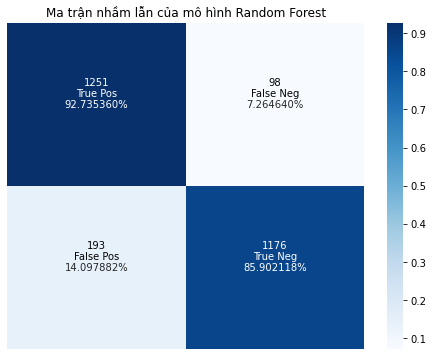

In [28]:
#Tính ma trận nhầm lẫn của mô hình KNN
cm_rf = confusion_matrix(y_test, predictions_rf_test)
print('Confusion matrix:')
print(cm_rf)

def annotate_heatmap(ax, data=None, fmt="d", threshold=None):
    if data is None:
        return
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = f"{data[i, j]}\n{labels[i*len(labels)//data.shape[1] + j]}"
            if labels[i*len(labels)//data.shape[1] + j] in ['True Neg', 'True Pos']:
                    color = "white"  # Đặt màu cho True Neg và True Pos là màu đen
            else:
                    color = "black"  
            ax.text(j + 0.5, i + 0.4, text, ha="center", va="center", color=color)

cm_rf_percentage = cm_rf / cm_rf.sum(axis=1)[:, np.newaxis]

# Đặt nhãn cho các chiều của ma trận
labels = ['True Pos', 'False Neg', 'False Pos', 'True Neg']

# Vẽ biểu đồ           
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_percentage, annot=True, fmt="2%", cmap='Blues', xticklabels=False, yticklabels=False)
plt.title('Ma trận nhầm lẫn của mô hình Random Forest')
ax = plt.gca()
annotate_heatmap(ax, cm_rf)
plt.show()

AUC của mô hình Random Forest: 0.9283228493253937


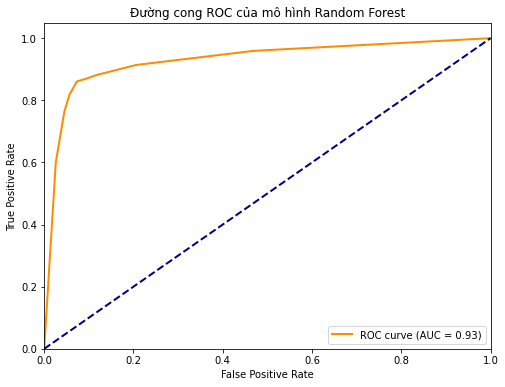

In [29]:
# Tính dự đoán của mô hình trên tập kiểm tra
y_score_rf = final_rf_model.predict_proba(X_test_copy_rf)[:,1]

# Tính FPR, TPR và ngưỡng
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_score_rf)

# Tính diện tích dưới đường ROC (AUC)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# In giá trị AUC và đường ROC
print("AUC của mô hình Random Forest:", roc_auc_rf)

# Vẽ đường ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC của mô hình Random Forest')
plt.legend(loc="lower right")
plt.show()

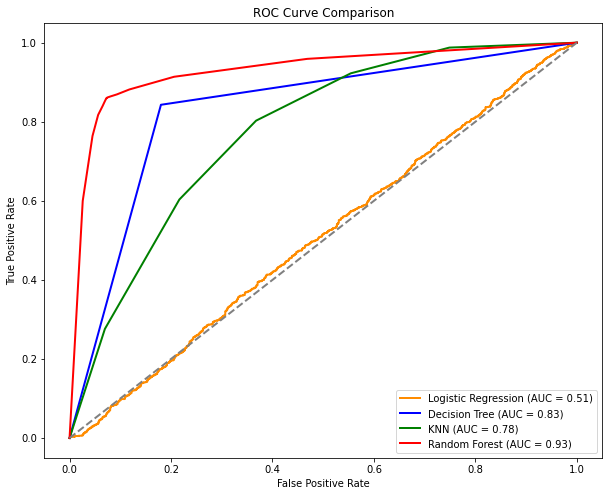

In [30]:
# Vẽ đường cong ROC cho tất cả các mô hình trên cùng một biểu đồ
plt.figure(figsize=(10, 8))

# Logistic Regression
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)

# Decision Tree
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)

# KNN
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)

# Random Forest
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

# Đường chéo ngẫu nhiên
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Đặt các nhãn và tiêu đề
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")

# Hiển thị biểu đồ
plt.show()